In [64]:
import os, fnmatch
import numpy
from PIL import Image
import csv
import gdal
import matplotlib.pyplot as plt


file = '/Users/gjmacdonald/Documents/Sea Ice Project/SIC_AMSR2/2020masked/clip_asi-AMSR2-s3125-20201001-v5.4.tif'
image = Image.open(file)
SICOct1 = numpy.array(image) #Oct 1

#x= 
#data = x.ReadAsArray()

dataset= gdal.Open('/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/Masked/HeatFlux1Oct_Extent.tif')
HeatFluxAll = dataset.ReadAsArray()
Oct1HF = HeatFluxAll[0,:,:] #Day 1 = index
#Nodata value = 9.969209968386869e+36

# Iceproduction = 84600*(3.125*3.125) * (1-SIC) * heatflux / 920 * (2.79*10^5)  check units of area

#SIC divded by two as is out of 200, and by 100 to make decimal. Check this for polynya area too!


#Iceproduction = 84600*(3.125*3.125)*(1-(SICOct1/2/100)*Oct1HF/920*(2.79*10**5)


                                     #Iceproduction = 84600*(3.125*3.125)*(1*Oct1HF/920*(2.79*10**5)

#Some random tab problem if continue in this cell

#Cheng did 0.75 but I did 0.75 for polynya area. Reasses
        #A[(A>5)&(A<10)]



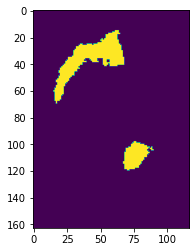

In [84]:
#Conveluted way of making values that are 0 to 0.7 = to 1, and all values >0.7 incl nodata = 0

Iceproduction = 84600*(3.125*3.125)*(1-(SICOct1/2/100)*Oct1HF/(920*(2.79*10**5))) #careful with brackets here especially after division
SICOct1_mask = SICOct1/2/100 #bc scaled
SICOct1_mask[SICOct1_mask == 0] = 0.1                                     
SICOct1_mask[SICOct1_mask > 0.7] = 0 
SICOct1_mask[(SICOct1_mask <= 0.7)&(SICOct1_mask>0)] = 1 
#Cheng did 0.75 but I did 0.75 for polynya area. Reasses

Iceproduction1Oct = SICOct1_mask*Iceproduction
plt.imshow(Iceproduction1Oct)
#Iceproduction1Oct[35,50] #824675491123.1085 823782665817.1965 823782.6658171966



In [105]:
##Try to loop through october. Above works for one day
##Seems to work - apart from misses last day, and may want to check if right since looks lower where less ice
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

outputfolder ='/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/IceProducTifsOctTest/'
path = '/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/SIC_OctTest/'  
noOfImages = 31 #no of images +1

dataset= gdal.Open('/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/Masked/HeatFlux1Oct_Extent.tif')
HeatFluxAll = dataset.ReadAsArray()
#Oct1HF = HeatFluxAll[0,:,:]


file_list2 = [x for x in sorted([x for x in os.listdir(path)])]
thing = '.DS_Store' #Hidden file that occurs. 
image_frames = []
days = np.arange(1,noOfImages)#Should this be 0?

for k in days:
    if k == days.shape[0]: #day.shape[0] gets the last index of shape, which breaks it. 
        break
    image = Image.open(path + file_list2[(days[k]-1)]) #Cycles through file list. 0-1 because index starts at 0 
    Y = np.array(image)
    Y = Y.astype("float") #Necessary to convert to Nan
    #Y[Y == 255] = np.nan #Convert nodata to NaN
    #Z = Y/2 # Because SIC are doubled in this resolution of dataset
    ##Get Heatflux
    Heatflux = HeatFluxAll[k-1,:,:] #assuming start from first band. k-1 cos first band indexed as 0, k starts at 1
    Iceproduction = 84600*(3.125*3.125)*(1-(Y/2/100)*Heatflux/(920*(2.79*10**5)))
    
    ##Make mask from SIC #Conveluted way of making values that are 0 to 0.7 = to 1, and all values >0.7 incl nodata = 0
    SICO_mask = Y/2/100
    SICO_mask[SICO_mask == 0] = 0.1 
    SICO_mask[SICO_mask > 0.7] = 0 
    SICO_mask[(SICOct1_mask <= 0.7)&(SICOct1_mask>0)] = 1 
    
    ##Apply mask to iceproduction
    Iceproduction = SICO_mask*Iceproduction
    
    #Just to print and look
    x = np.sum(Iceproduction)
    print(x)

    
    plt.figure(figsize=(10,10), dpi= 90)
    plt.imshow(Iceproduction, interpolation='none', cmap='jet')#,vmin=70, vmax=100
    plt.colorbar()
    plt.title('Ice production '+file_list2[k-1][21:29]); #K-1 because of indexing starting at 0. Otherwise titles from 2nd date
    plt.savefig(outputfolder+file_list2[k-1][:-4]+'.tif')#The -4 omits the tif part from file name for jpeg
    plt.close() #try to stop printing all in notebook

261854039.90636098
283444511.71941173
478501033.74733967
334540270.5729194
239113635.02579296
308685716.60412055
581728772.1739724
473362812.6665822
627319086.0608867
335206684.04559076
322446224.0224902
408342902.38911235
397829311.0029699
451899242.5123725
233525909.4054948
50850315.6047243
228830169.26253283
123159711.19293477
339991927.75473577
287509245.61173546
287679693.2240908
377183683.7764817
270968934.6790577
507397122.16378015
289293012.4820971
231995212.4388791
247707720.2093386
189098750.21796712
330289979.65880424


In [117]:
##Write total productions to file
## NEED TO FIX THIS. THIS DOESN'T CURRENTLY WORK. I THINK IT'S BECAUSE OF COLORBAR AND OTHER INFO ADDED TO TIFS
#STOP GAP IS RUN TO CREATE FILE BUT RPELACE VALUES FROM PRINTS ABOVE SCRIPT
#ONE SOLUTION IS NOT ADD EXTRAS TO TIFFS, ADD COLORBARS LATER IF NEEDED ON SEPARATE BATCH
#IDEAL PERHAPS IS TO WRITE TO FILE AS PART OF ABOVE SCRIPT'S FOR LOOP



import glob as glob

in_directory = "/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/IceProducTifsOctTest/" #set folder with tifs

file_list2 = [x for x in sorted([x for x in os.listdir("/Users/gjmacdonald/Documents/Sea Ice Project/AutoSeaIceProduc2/IceProducTifsOctTest/")])]
thing = '.DS_Store' #Hidden file that occurs. Have to do this for any other non-tiff files
while thing in file_list2: file_list2.remove(thing)    

myfile = open('2020_OctTest_Iceproduction.csv', 'w') #set name
myfile.write('filename' + ',' + 'ice production (units?)'+'\n') #Add headers
for file in file_list2:
    (infilepath, infilename)= os.path.split (file)
    image = Image.open(in_directory+file)
    array = numpy.array(image)
    array = array.astype("float")
    #polynyaPixels = (array < 70).sum()
    #AreaKm2 = (3.125*3.125)*polynyaPixels #Resolution of pixels * no of pixels
    TotalDailyIceProduction = np.sum(array) #Resolution of pixels * no of pixels. Need to address resolution here, or I think not cos addressed earlier in calc
    print(TotalDailyIceProduction)

    #Need to do area calculation
    #print(polynyaPixels)
    myfile.write(infilename + ',' + str(TotalDailyIceProduction)+'\n')
    #Write filename and number to file
                             
myfile.close() #Note I think file saves where script is saved

490576765.0
491438861.0
490896659.0
490251457.0
488907204.0
491658843.0
494567468.0
491725072.0
493143600.0
490091755.0
489653343.0
490726945.0
489622649.0
490101988.0
488507017.0
486222815.0
487450220.0
486664655.0
489126117.0
488277197.0
488882633.0
489680727.0
488236778.0
491565256.0
487829474.0
488383352.0
488675090.0
488211484.0
489649571.0


In [115]:
test = Image.open(in_directory+file)
array = numpy.array(image)

In [120]:
array.shape

(900, 900, 4)

In [134]:
#Open A and make raster
path2 = '/Users/gjmacdonald/Documents/Sea Ice Project/SIC_AMSR2/2020masked/'
StackEx= gdal.Open(path2+'clip_asi-AMSR2-s3125-20200302-v5.4.tif')
StackEx2 = StackEx.ReadAsArray()

#Open B and make raster



In [135]:
StackEx2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)